In [640]:
# Grupo:
# Nicolas Oliveira da Silva - RM98939
# Guilherme Barreto Santos – RM97674 
# Professor: Carlos André M. Vieira
# Sala: 2ESPV

In [642]:
#PACOTES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import pingouin as pg
import statsmodels.formula.api as smf
# importando os pacotes

In [644]:
df = pd.read_csv("Cities1.csv", sep=',')
# importando o dataframe e atribuindo ele à df

In [646]:
# Entendendo o DataFrame(Cities.csv):

In [648]:
# Esse DataFrame mostra dados sobre a qualidade do ar de 0 (ruim) à 100 (muito boa) e a poluição da água de 0 (sem poluição) à 100 (poluição extrema) de várias cidades, mostrando a
# sua região e o seu país.

In [650]:
print(df.info())
# .info() -> mostra as colunas, quantos valores não nulos e qual o tipo da coluna

# O dataFrame df possui 5 colunas, "City", "Region", "Country", "AirQuality", "WaterPollution"
# "City" -> valores do tipo Object (String)
# "Region" -> valores do tipo Object (String)
# "Country" -> valores do tipo Object (String)
# "AirQuality" -> valores do tipo float (números decimais)
# "WaterPollution" -> valores do tipo float (números decimais)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3538 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB
None


In [652]:
print(df.shape)
# shape -> mostra a quantidade de colunas e linhas

print('')

print(df['Country'].nunique())
print(df['Region'].nunique())
print(df['City'].nunique())
# nunique() -> mostra a quantidade de valores diferentes em uma coluna

print('')

print('Lista de todos os países que estão no df:')
print(df['Country'].unique())
# unique() -> mostra os valores que estão na coluna

print('')

print('Os países que mais aparecem em df: ')
print(df['Country'].value_counts().head(10))
# value_counts() -> mostra a frêquencia dos valores em uma coluna
# head (x) -> mostra os primeiros valores de uma coluna, x é a quantidade de valores inicias que será mostrado

# df possui 3.963 linhas e 5 colunas
# Na coluna "Country" tem 177 valores diferentes 
# Na coluna "Region" tem 1.152 valores diferentes
# Na coluna "City" tem 3.796 valores diferentes
# Os países que mais aparecem no df são Estados Unidos, China, Reino Unido, Canada, India, Alemanha, Brasil, Polônia, Russia, Espanha

(3963, 5)

177
1152
3796

Lista de todos os países que estão no df:
['United States of America' 'Germany' 'Switzerland' 'United Kingdom'
 'Egypt' 'France' 'Canada' 'Brazil' 'Lithuania' 'Monaco' 'Belgium'
 'Poland' 'Uzbekistan' 'Italy' 'Singapore' 'North Macedonia' 'Slovenia'
 'Bulgaria' 'Norway' 'Portugal' 'United Arab Emirates' 'Russia'
 "People's Republic of China" 'Georgia' 'India' 'Czech Republic' 'Israel'
 'Uruguay' 'Bangladesh' 'Pakistan' 'Croatia' 'Philippines' 'Argentina'
 'Mexico' 'Japan' 'Bolivia' 'Spain' "Cote d'Ivoire" 'Greece' 'Venezuela'
 'Guatemala' 'Cuba' 'Austria' 'Sweden' 'Finland' 'Ireland' 'Iceland'
 'Estonia' 'Latvia' 'Slovakia' 'Hungary' 'Luxembourg' 'Liechtenstein'
 'San Marino' 'Cambodia' 'Vietnam' 'Thailand' 'Andorra' 'Malaysia'
 'Taiwan' 'Ukraine' 'Chile' 'South Sudan' 'Armenia' 'Tanzania' 'Sudan'
 'Belarus' 'Somalia' 'The Bahamas' 'Yemen' 'Colombia' 'Peru' 'Ecuador'
 'Paraguay' 'Suriname' 'Nepal' 'Belize' 'Costa Rica' 'El Salvador'
 'Australia' 'Honduras' 'Ni

In [654]:
# Métricas básicas de cada coluna(): 

In [656]:
print('Métricas básicas de "AirQuality": ')

print(df['AirQuality'].describe().T)
# describe().T -> gerar estatísticas descritivas, uma visão rápida e resumida das principais medidas estatísticas dos dados

print('')

print('Valores nulos da coluna "AirQuality":')
print(df['AirQuality'].isnull().sum())
# isnull() -> verifica se o valor é nulo
# sum() -> retorna a soma total (neste caso a soma total de valores nulos)

print('')

print('Moda dos valores:')
print(df['AirQuality'].mode())
# mode() -> retorna a moda da coluna

print('')

print('Variância dos valores:')
print(df['AirQuality'].var())
# var() -> retorna a variância da coluna

# valores não nulos: 3.963 valores
# valores nulos: 0
# valor mínimo: 0
# valor máximo: 100
# moda: 100.0 
# média: 62.253452
# quantile(0.25): 37.686567
# quantile(0.50)/mediana: 69.444444
# quantile(0.75): 87.500000
# desvio-padrão: 30.944753
# variância: 957.5777631549008

Métricas básicas de "AirQuality": 
count    3963.000000
mean       62.253452
std        30.944753
min         0.000000
25%        37.686567
50%        69.444444
75%        87.500000
max       100.000000
Name: AirQuality, dtype: float64

Valores nulos da coluna "AirQuality":
0

Moda dos valores:
0    100.0
Name: AirQuality, dtype: float64

Variância dos valores:
957.5777631549008


In [658]:
# Gráfico de dispersão da coluna "AirQuality":

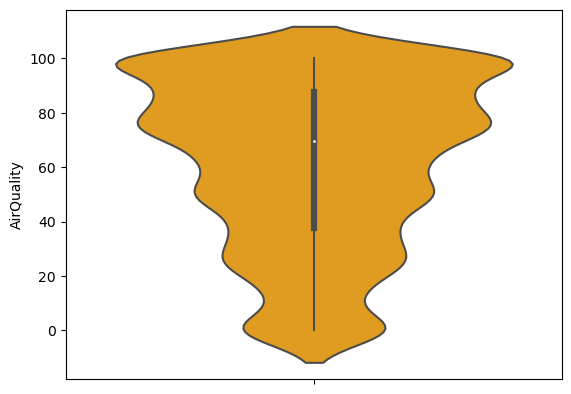

In [660]:
sns.violinplot(data=df, y='AirQuality', color='orange')
plt.show()

# O gráfico violinplot é uma ferramenta poderosa de visualização de dados fornecida pela biblioteca seaborn e é usada para mostrar a distribuição de uma variável quantitativa em 
# diferentes níveis de uma variável (A largura do eixo y representa a densidade dos dados nesse valor específico). Com isso, podemos afirmar que na coluna "AirQuality" os dados estão
# mais concentrados na faixa de 60% a 90%.

In [758]:
print('Métricas básicas de "WaterPollution": ')
print(df['WaterPollution'].describe().T)
# describe().T -> gerar estatísticas descritivas, uma visão rápida e resumida das principais medidas estatísticas dos dados

print('')

print('Valores não nulos da coluna "WaterPollution":')
print(df['WaterPollution'].isnull().sum())
#isnull() -> verifica se o valor é nulo
# sum() -> retorna a soma total (neste caso a soma total de valores nulos)

print('')

print('Moda dos valores')
print(df['WaterPollution'].mode())
# mode() -> retorna a moda da coluna

print('')

print('Variância dos valores:')
print(df['WaterPollution'].var())
# var() -> retorna a variância da coluna

# valores não nulos: 3.963 valores
# valores nulos: 0
# valor mínimo: 0
# valor máximo: 100
# moda: 50.0 
# média: 44.635372
# quantile(0.25): 25
# quantile(0.50)/mediana: 50
# quantile(0.75): 57.719393
# desvio-padrão: 25.663910
# variância: 658.6362831753934

Métricas básicas de "WaterPollution": 
count    3963.000000
mean       44.635372
std        25.663910
min         0.000000
25%        25.000000
50%        50.000000
75%        57.719393
max       100.000000
Name: WaterPollution, dtype: float64

Valores não nulos da coluna "WaterPollution":
0

Moda dos valores
0    50.0
Name: WaterPollution, dtype: float64

Variância dos valores:
658.6362831753934


In [664]:
# Gráfico de dispersão da coluna "WaterPollution":

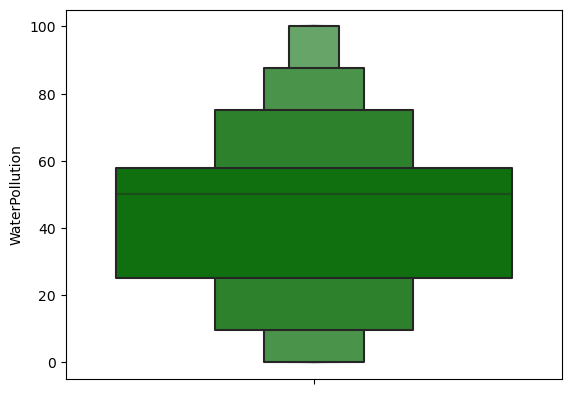

In [666]:
sns.boxenplot(data=df, y='WaterPollution', color='green')
plt.show()

# boxenplot é um tipo de gráfico utilizado em estatística descritiva para visualizar a distribuição de uma variável quantitativa em diferentes categorias e com o gráfico podemos afirmar que na
# coluna "WaterPollution" há uma maior concentração dos dados de aproximadamente 30% a 60%

In [668]:
print('Métricas básicas de "Country": ')
print(df['Country'].describe().T)
# mostra a quantidade de valores não nulos, diferentes, o valor mais frequente e quantas vezes ele apareceu na coluna "Country"
print('Valores não nulos da coluna "Country":')
print(df['Country'].isnull().sum())

# valores não nulos: 3.963 valores
# valores nulos: 0
# valor que mais aparece: "United States of America"
# frequência do valor que mais aparece: 842

Métricas básicas de "Country": 
count                         3963
unique                         177
top       United States of America
freq                           842
Name: Country, dtype: object
Valores não nulos da coluna "Country":
0


In [670]:
print('Métricas básicas de "Region": ')
print(df['Region'].describe().T)
# mostra a quantidade de valores não nulos, diferentes, o valor mais frequente e quantas vezes ele apareceu na coluna "Region"
print('Valores não nulos da coluna "Region":')
print(df['Region'].isnull().sum())

# valores não nulos: 3.538 valores
# valores nulos: 425
# valor que mais aparece: "England"
# frequência do valor que mais aparece: 142

Métricas básicas de "Region": 
count        3538
unique       1152
top       England
freq          142
Name: Region, dtype: object
Valores não nulos da coluna "Region":
425


In [672]:
print('Métricas básicas de "City": ')
print(df['City'].describe().T)
# mostra a quantidade de valores não nulos, diferentes, o valor mais frequente e quantas vezes ele apareceu na coluna "City"
print('Valores não nulos da coluna "City":')
print(df['City'].isnull().sum())

# valores não nulos: 3963 valores
# valores nulos: 0
# valor que mais aparece: "Albany"

Métricas básicas de "City": 
count       3963
unique      3796
top       Albany
freq           4
Name: City, dtype: object
Valores não nulos da coluna "City":
0


In [674]:
# Calculando os Outliers das colunas "AirQuality"

In [676]:
Q1_AirQ = df['AirQuality'].quantile(0.25) # 37.686567165
Q3_AirQ = df['AirQuality'].quantile(0.75) # 87.5
IQR_AirQ = Q3_AirQ  - Q1_AirQ # 49.813432835
limite_sup_AirQ = Q3_AirQ + IQR_AirQ * 1.5 # 162.2201492525
limite_inf_AirQ = Q1_AirQ - IQR_AirQ * 1.5 # -37.033582087499994
# A partir dos dados, podemos afirmar que na coluna "AirQuality" são considerados outlier os valores que estão abaixo de aproximadamente -37% e acima de aproximadamente 162% 

outliers = (df['AirQuality'] > limite_sup_AirQ) | (df['AirQuality'] < limite_inf_AirQ)
print(outliers.shape)
# Com isso nenhum dado da coluna "AirQuality" é considerado um outlier

(3963,)


In [678]:
# Calculando os Outliers das colunas "WaterPollution"

In [680]:
Q1_WP = df['WaterPollution'].quantile(0.25) # 25.0
Q3_WP = df['WaterPollution'].quantile(0.75) # 57.71939328
IQR_WP = Q3_WP - Q1_WP # 32.71939328
limite_sup_WP = Q3_WP + IQR_WP * 1.5 # 106.79848319999999
limite_inf_WP = Q1_WP - IQR_WP * 1.5 # -24.07908992
# A partir dos dados, podemos afirmar que na coluna "WaterPollution" são considerados outlier os valores que estão abaixo de aproximadamente -24% e acima de aproximadamente 106%

outliers = (df['AirQuality'] > limite_sup_WP) | (df['AirQuality'] < limite_inf_WP)
print(outliers.shape)
# Com isso nenhum dado da coluna "WaterPollution" é considerado um outlier

(3963,)


In [682]:
# Calculando os países com os melhores/piores dados na coluna "AirQuality": 

In [684]:
media_pais_AirQuality = df.groupby('Country')['AirQuality'].mean()
# groupby() -> operações de agregação em dados
# mean() -> faz a média
# Agrupa os dados por país da coluna "Country" e faz a média de todos os valores de cada país da coluna "AirQuality"
# media_pais_AirQuality -> Série pandas onde o índice é cada país da coluna "Country" e cada país está com sua média na coluna "AirQuality" em df

media_pais_AirQuality_ordenado = media_pais_AirQuality.sort_values(ascending=False)
# sort_values() -> ordena os dados (media_pais_AirQuality), ascending=False ordena de forma decrescente

print(media_pais_AirQuality_ordenado.head(10))
# head(10) -> mostra os 10 primeiros elementos 
# mostra os 10 países com a melhor média de qualidade do ar

print('----------------------------------------')

print(media_pais_AirQuality_ordenado.tail(10))
# tail(10) -> mostra os 10 últimos elementos
# mostra os 10 países com a pior média de qualidade do ar

# A partir dos dados, podemos afirmar que os países Estados Federados da Micronésia, Eritreia e Palau são países que possuem a qualidade do ar no valor máximo e os países República 
# Centro-Africana, Guiné e Costa do Marfim possuem a pior média de qualidade de ar

Country
Federated States of Micronesia    100.000000
Eritrea                           100.000000
Palau                             100.000000
Finland                            95.771386
Estonia                            94.190796
Eswatini                           93.750000
Norway                             88.684587
Barbados                           88.333333
Liechtenstein                      87.500000
San Marino                         87.500000
Name: AirQuality, dtype: float64
----------------------------------------
Country
Angola                        15.000000
Kazakhstan                    13.737825
Madagascar                    13.636364
Haiti                         12.500000
Myanmar                       12.462207
People's Republic of China    10.761067
Liberia                        8.333333
Cote d'Ivoire                  6.944444
Guinea                         5.000000
Central African Republic       0.000000
Name: AirQuality, dtype: float64


In [686]:
# Gráfico com 20 países aleatórios em relação a qualidade do ar:

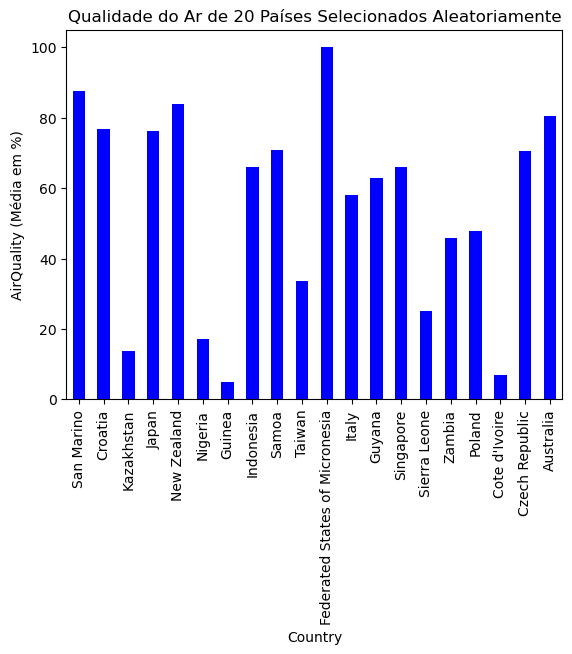

In [688]:
paises_aleatorios_AirQuality = pd.Series(media_pais_AirQuality_ordenado).sample(n=20)
# media_pais_AirQuality_ordenado -> Serie pandas onde o índice são os valores únicos da coluna "Country" e os valores são as médias correspondentes de AirQuality para cada país
# sample(x) -> pode ser usada tanto para DataFrames, como para series pandas e seleciona x amostras aleatórias
# paises_aleatorios_AirQuality -> nova Série pandas que seleciona 20 elementos aleatoriamente a partir de media_pais_AirQuality_ordenado

paises_aleatorios_AirQuality.plot(kind='bar', color='blue')
# plot() -> método que permite a criação de vários tipos de gráficos diretamente de DataFrames ou Séries, kind='bar' cria um gráfico de barras e color='blue' deixa as barras azul
plt.title('Qualidade do Ar de 20 Países Selecionados Aleatoriamente')
# plt.title() -> Define o título do gráfico
plt.xlabel('Country')
# plt.xlabel() -> Define o rótulo do eixo x
plt.ylabel('AirQuality (Média em %)')
# plt.ylabel() -> Define o rótulo do eixo y 
plt.xticks(rotation=90)
# plt.xticks() -> Define a rotação do rótulo do eixo x
plt.show()
# exibe o gráfico

# Esse gráfico seleciona 20 países aleatórios todas as vezes que roda essa célula de código e mostra a média dos valores na coluna "AirQuality" em porcentagem. A partir dele podemos  
# ver o quanto pode haver de dispersão entre os países na coluna "AirQuality". Enquanto alguns países possuem sua média acima dos 90% (média muito boa), outros países possuem a sua 
# média abaixo dos 20%.

In [689]:
# Calculando os países com a melhor e pior poluição da água:

In [692]:
media_pais_WaterPollution = df.groupby('Country')['WaterPollution'].mean()
# groupby() -> operações de agregação em dados
# mean() -> faz a média
# Agrupa os dados por país da coluna "Country" e faz a média de todos os valores de cada país da coluna "WaterPollution"
# media_pais_WaterPollution -> Série pandas onde o índice é cada país da coluna "Country" e cada país está com sua média na coluna "WaterPollution" em df

media_pais_WaterPollution_ordenado = media_pais_WaterPollution.sort_values(ascending=True)
# sort_values() -> ordena os dados (media_pais_WaterPollution), ascending=True ordena de forma crescente

print(media_pais_WaterPollution_ordenado.head(10))
# head(10) -> mostra os 10 primeiros elementos 
# mostra os 10 países com a maior média de poluição de água

print('----------------------------------------')

print(media_pais_WaterPollution_ordenado.tail(10))
# tail(10) -> mostra os 10 últimos elementos
# mostra os 10 países com a média mais baixa de poluição da água

# A partir dos dados, podemos afirmar que os países Liechtenstein, Palau e Turcomenistão possuem a menor média de poluição de água, enquanto os países Estados Federados da Micronésia
# Serra Leoa, Níger, Benin, República Centro-Africana possuem a pior média em relação a poluição de água, com os valores máximos

Country
Liechtenstein     0.000000
Palau             0.000000
Turkmenistan     18.055556
Sweden           18.842412
Finland          19.231145
Latvia           21.131815
Switzerland      22.089957
Slovenia         22.613987
Singapore        24.204947
Croatia          24.544349
Name: WaterPollution, dtype: float64
----------------------------------------
Country
Gabon                              87.500000
Lebanon                            90.763449
Marshall Islands                   91.666667
Guinea                             93.750000
Maldives                           93.750000
Central African Republic          100.000000
Benin                             100.000000
Niger                             100.000000
Sierra Leone                      100.000000
Federated States of Micronesia    100.000000
Name: WaterPollution, dtype: float64


In [694]:
# Gráfico com 20 países aleatórios em relação a poluição da água:

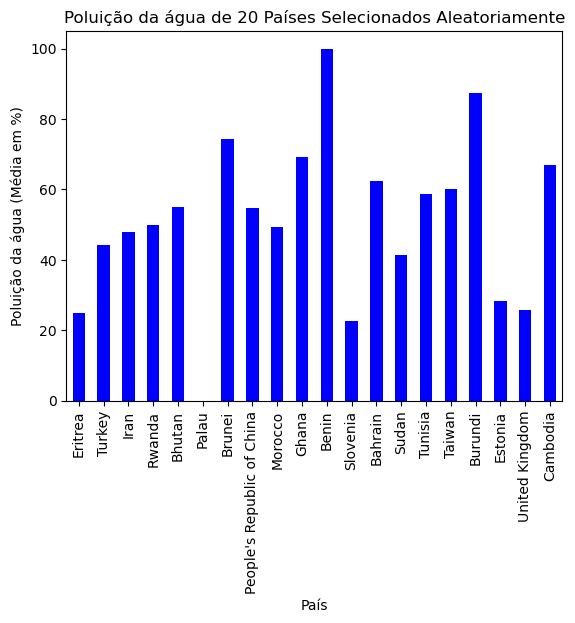

In [696]:
paises_aleatorios_WaterPollution = pd.Series(media_pais_WaterPollution_ordenado).sample(n=20)
# media_pais_WaterPollution_ordenado -> Serie pandas onde o índice são os valores únicos da coluna "Country" e os valores são as médias correspondentes de WaterPollution para cada país
# sample(x) -> pode ser usada tanto para DataFrames, como para series pandas e seleciona x amostras aleatórias
# paises_aleatorios_WaterPollution -> nova Série pandas que seleciona 20 elementos aleatoriamente a partir de media_pais_WaterPollution_ordenado

paises_aleatorios_WaterPollution.plot(kind='bar', color='blue')
# plot() -> método que permite a criação de vários tipos de gráficos diretamente de DataFrames ou Séries, kind='bar' cria um gráfico de barras e color='blue' deixa as barras azul
plt.title('Poluição da água de 20 Países Selecionados Aleatoriamente')
# plt.title() -> Define o título do gráfico
plt.xlabel('País')
# plt.xlabel() -> Define o rótulo do eixo x
plt.ylabel('Poluição da água (Média em %)')
# plt.ylabel() -> Define o rótulo do eixo y 
plt.xticks(rotation=90)
# plt.xticks() -> Define a rotação do rótulo do eixo x
plt.show()
# exibe o gráfico

# Esse gráfico seleciona 20 países aleatórios todas as vezes que roda essa célula de código e mostra a média dos valores na coluna "WaterPollution" em porcentagem. Diferente do gráfico
# que mostra a média de 20 países aleatórios na coluna "AirQuality", a gráfico a seguir representa que quanto maior for a média de "WaterPollution", mais preocupante se encontra a ]]
# situação do país selecionado. Com isso, muitos países se encontram em estado crítico quando falamos de poluição da água como podemos observar no gráfico, muitos países estão com a 
# média acima dos 80%, o que é uma média muito ruim

In [697]:
# Análises sobre o Brasil:

In [698]:
print('Estados brasileiros que aparecem no DataFrame: ')
print(df[df['Country'] == 'Brazil']['Region'].unique())
# filtra o df para selecionar apenas as linhas onde na coluna "Country" é igual a Brazil
# Após a filtragem, seleciona todas as linhas da coluna "Region" (onde na coluna "Country" é igual a Brazil)
# unique() -> retorna os valores únicos da Série

nunique_region = df[df['Country'] == 'Brazil']['Region'].nunique()
print(f'Quantidade de regições em df: {nunique_region}')
# filtra o df para selecionar apenas as linhas onde na coluna "Country" é igual a Brazil
# Após a filtragem, seleciona todas as linhas da coluna "Region" (onde na coluna "Country" é igual a Brazil)
# nunique() -> retorna a quantidade dos valores únicos

print('')
print('Cidades brasileiras que aparecem no DataFrame:')
print(df[df['Country'] == 'Brazil']['City'].unique())
# filtra o df para selecionar apenas as linhas onde na coluna "Country" é igual a Brazil
# Após a filtragem, seleciona todas as linhas da coluna "City" (onde na coluna "Country" é igual a Brazil)
# unique() -> retorna os valores únicos da Série

nunique_city = df[df['Country'] == 'Brazil']['City'].nunique()
print(f'Quantidade de cidades em df: {nunique_city}')
# filtra o df para selecionar apenas as linhas onde na coluna "Country" é igual a Brazil
# Após a filtragem, seleciona todas as linhas da coluna "City" (onde na coluna "Country" é igual a Brazil)
# nunique() -> retorna a quantidade dos valores únicos

# O DataFrame df tem dados sobre 103 cidades Brasileiras que fazem parte de 22 estados Brasileiros

Estados brasileiros que aparecem no DataFrame: 
['Sao Paulo' 'Federal District' 'Parana' 'Rio de Janeiro' 'Pernambuco'
 'Maranhao' 'Bahia' 'Amazonas' 'Rio Grande do Sul' 'Minas Gerais' 'Ceara'
 'Goias' 'Rio Grande do Norte' 'Santa Catarina' 'Piaui' 'Paraiba'
 'Espirito Santo' 'Mato Grosso do Sul' 'Mato Grosso' 'Rondonia' 'Roraima'
 'Para']
Quantidade de regições em df: 22

Cidades brasileiras que aparecem no DataFrame:
['Sao Paulo' 'Brasilia' 'Osasco' 'Curitiba' 'Rio de Janeiro' 'Olinda'
 'Sao Luis' 'Salvador' 'Manaus' 'Porto Alegre' 'Belo Horizonte'
 'Fortaleza' 'Recife' 'Santos' 'Goiania' 'Pelotas' 'Caxias do Sul' 'Natal'
 'Florianopolis' 'Joinville' 'Teresina' 'Joao Pessoa' 'Vitoria'
 'Campo Grande' 'Cuiaba' 'Campinas' 'Porto Velho' 'Niteroi' 'Boa Vista'
 'Sao Bernardo do Campo' 'Guarulhos' 'Ribeirao Preto' 'Nova Iguacu'
 'Sorocaba' 'Petropolis' 'Sao Jose dos Campos' 'Santo Andre' 'Londrina'
 'Juiz de Fora' 'Duque de Caxias' 'Canoas' 'Uberlandia' 'Mogi das Cruzes'
 'Sao Carlos' 'Fei

In [700]:
# Quantas vezes cada estado apareceu em df:

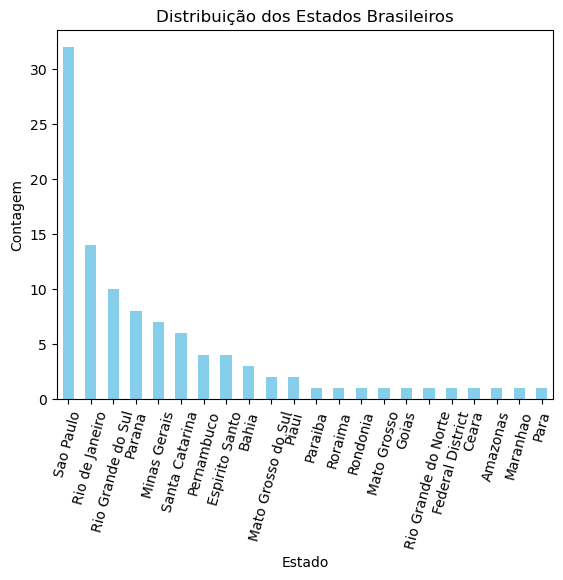

In [704]:
estados_brasil = df[df['Country'] == 'Brazil']['Region'].unique()
# filtra o df para selecionar apenas as linhas onde na coluna "Country" é igual a Brazil
# Após a filtragem, seleciona todas as linhas da coluna "Region" (onde na coluna "Country" é igual a Brazil)
# unique() -> retorna os valores únicos da Série

estados_brasil_contagem = df[df['Country'] == 'Brazil']['Region'].value_counts()
# value_counts() -> mostra a frêquencia dos valores em uma coluna ("Region" quando na coluna "Country" é igual a Brazil)

estados_brasil_contagem.plot(kind='bar', color='skyblue')
# plot() -> método que permite a criação de vários tipos de gráficos diretamente de DataFrames ou Séries, kind='bar' cria um gráfico de barras e color='skyblue' deixa as barras azul claro
plt.title('Distribuição dos Estados Brasileiros')
# plt.title() -> Define o título do gráfico
plt.xlabel('Estado')
# plt.xlabel() -> Define o rótulo do eixo x
plt.ylabel('Contagem')
# plt.ylabel() -> Define o rótulo do eixo y 
plt.xticks(rotation=75)
# plt.xticks() -> Define a rotação do rótulo do eixo x
plt.show()
# exibe o gráfico

# A partir do grafico, podemos analisar que há uma grande dispersão quando falamos em estados brasileiros que aparecem em df. Enquanto São Paulo aparece o dobro de vezes do segundo
# que mais aparece, Rio de Janeiro, a maioria dos estados aparecem poucas vezes, com uma faixa abaixo de 3 

In [705]:
# Média dos estados brasileiros na coluna "AirQuality" e "WaterPollution":

In [708]:
media_estados_brasileiros_AirQuality = df[df['Country'] == 'Brazil'].groupby('Region')['AirQuality'].mean()
# faz a filtragem de df para somente as linhas em que na coluna "Country" o valor for igual a Brazil
# groupby() -> operações de agregação em dados
# mean() -> faz a média
# Agrupa os dados por estado da coluna "Region" onde somente na coluna "Country" for Brazil e faz a média de todos os valores de cada estado da coluna "AirQuality"
# media_estados_brasileiros_AirQuality -> Série pandas onde o índice é cada estado da coluna "Region" e cada estado está com sua média na coluna "AirQuality" em df

media_estados_brasileiros_AirQuality_ordenado = media_estados_brasileiros_AirQuality.sort_values(ascending=False)

print('Média dos estados brasileiros na coluna "AirQuality": ')
print(media_estados_brasileiros_AirQuality_ordenado)

print('-----------------------------------------------------------')

media_estados_brasileiros_WaterPollution = df[df['Country'] == 'Brazil'].groupby('Region')['WaterPollution'].mean()
# faz a filtragem de df para somente as linhas em que na coluna "Country" o valor for igual a Brazil
# groupby() -> operações de agregação em dados
# mean() -> faz a média
# Agrupa os dados por estado da coluna "Region" onde somente na coluna "Country" for Brazil e faz a média de todos os valores de cada estado da coluna "AirQuality"
# media_estados_brasileiros_AirQuality -> Série pandas onde o índice é cada estado da coluna "Region" e cada estado está com sua média na coluna "AirQuality" em df

media_estados_brasileiros_WaterPollution_ordenado = media_estados_brasileiros_WaterPollution.sort_values(ascending=True)

print('Média dos estados brasileiros na coluna "WaterPollution": ')
print(media_estados_brasileiros_WaterPollution_ordenado)

Média dos estados brasileiros na coluna "AirQuality": 
Region
Roraima                91.666667
Piaui                  87.500000
Paraiba                86.111111
Mato Grosso do Sul     83.750000
Para                   81.250000
Rio Grande do Norte    80.681818
Parana                 80.595992
Federal District       76.530612
Rio Grande do Sul      72.716102
Santa Catarina         72.591645
Goias                  68.750000
Ceara                  66.666667
Pernambuco             65.416667
Minas Gerais           61.595982
Rio de Janeiro         59.080327
Bahia                  56.833333
Sao Paulo              55.555177
Rondonia               50.000000
Maranhao               50.000000
Espirito Santo         48.237179
Amazonas               31.250000
Mato Grosso            25.000000
Name: AirQuality, dtype: float64
-----------------------------------------------------------
Média dos estados brasileiros na coluna "WaterPollution": 
Region
Parana                  33.405797
Mato Grosso        

In [710]:
# Gráfico da média dos estados brasileiros na coluna "AirQuality":

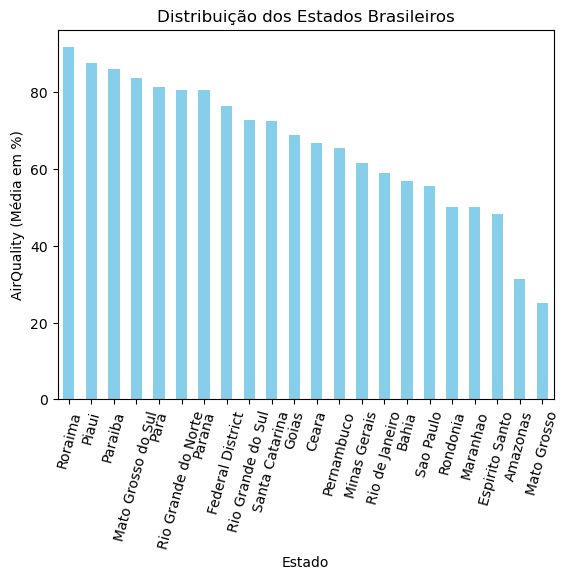

In [712]:
media_estados_brasileiros_AirQuality_ordenado.plot(kind='bar', color='skyblue')
# plot() -> método que permite a criação de vários tipos de gráficos diretamente de DataFrames ou Séries, kind='bar' cria um gráfico de barras e color='skyblue' deixa as barras azul claro
plt.title('Distribuição dos Estados Brasileiros')
# plt.title() -> Define o título do gráfico
plt.xlabel('Estado')
# plt.xlabel() -> Define o rótulo do eixo x
plt.ylabel('AirQuality (Média em %)')
# plt.ylabel() -> Define o rótulo do eixo y 
plt.xticks(rotation=75)
# plt.xticks() -> Define a rotação do rótulo do eixo x
plt.show()
# exibe o gráfico

# Com o gráfico, vemos que Roraima é o estado que possui a melhor média em relação à dados na coluna "AirQuality", estando acima de 90% (dado muito bom). Também podemos afirmar que principalmente 
# dois estados estão em estados críticos que são Amazonas e Mato Grosso, chegando a menos de 40% 

In [713]:
# Gráfico da média dos estados brasileiros na coluna "WaterPollution":

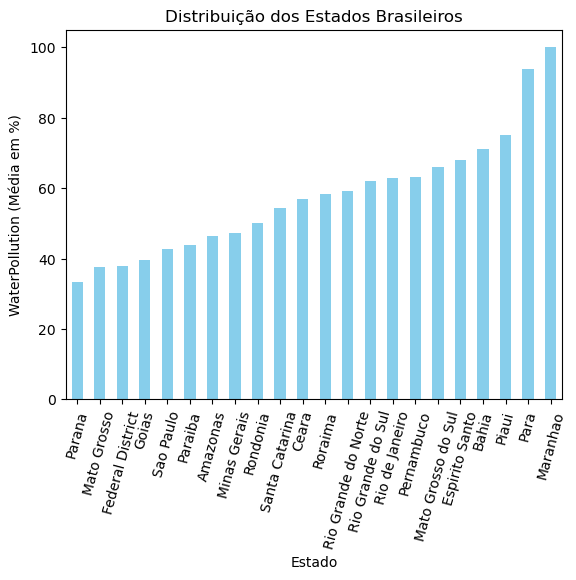

In [716]:
media_estados_brasileiros_WaterPollution_ordenado.plot(kind='bar', color='skyblue')
# plot() -> método que permite a criação de vários tipos de gráficos diretamente de DataFrames ou Séries, kind='bar' cria um gráfico de barras e color='skyblue' deixa as barras azul claro
plt.title('Distribuição dos Estados Brasileiros')
# plt.title() -> Define o título do gráfico
plt.xlabel('Estado')
# plt.xlabel() -> Define o rótulo do eixo x
plt.ylabel('WaterPollution (Média em %)')
# plt.ylabel() -> Define o rótulo do eixo y 
plt.xticks(rotation=75)
# plt.xticks() -> Define a rotação do rótulo do eixo x
plt.show()
# exibe o gráfico

# O gráfico a seguir mostra que Maranhão e Para estão em estado crítico quando falamos de poluição de água, principalmente o Maranhão que atinge o nível máximo.  

In [717]:
# Análises das regiões do Brasil:

In [720]:
media_brasil_AirQuality = df[df['Country'] == 'Brazil']['AirQuality'].mean()
# filtra o DataFrame df, fazendo a média dos valores da coluna "AirQuality" quando na coluna "Country" for igual à Brazil
print(f'A média total dos estados brasileiros na coluna "AirQuality" é: {media_brasil_AirQuality}')

media_brasil_WaterPollution = df[df['Country'] == 'Brazil']['WaterPollution'].mean()
# # filtra o DataFrame df, fazendo a média dos valores da coluna "WaterPollution" quando na coluna "Country" for igual à Brazil
print(f'A média total dos estados brasileiros na coluna "WaterPollution" é: {media_brasil_WaterPollution}')

# Através desses dados, as regiões do Brasil possuem aproximadamente 63% em relação a qualidade do ar e aproximadamente 52% em relação a poluição da água 

A média total dos estados brasileiros na coluna "AirQuality" é: 63.29187578436893
A média total dos estados brasileiros na coluna "WaterPollution" é: 52.74759472106797


In [722]:
# Gráfico que mostra o Brasil sobre os seus dados da qualidade do ar e a poluição da água

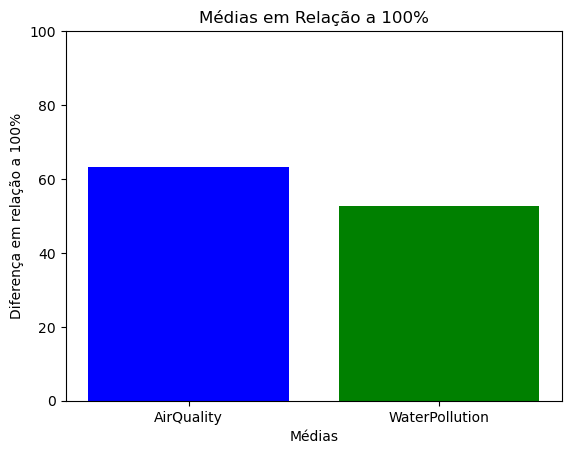

In [764]:
labels = ['AirQuality', 'WaterPollution']
# variável que vai ser os rótulos dos gráficos no eixo x 
plt.bar(labels, [media_brasil_AirQuality, media_brasil_WaterPollution], color=['blue', 'green'])
# plt.bar() -> cria um gráfico de barras
plt.title('Médias em Relação a 100%')
# plt.title() -> define o título do gráfico
plt.xlabel('Médias')
# plt.xlabel() -> define o rótulo do eixo X
plt.ylim(0, 100)
#plt.ylim() -> define os limites do eixo Y para que o gráfico vá de 0 a 100
plt.ylabel('Diferença em relação a 100%')
# plt.ylabel() -> define o rótulo do eixo y
plt.show()
# plt.show() -> mostra o gráfico

# A partir do gráfico, podemos ver o quanto falta para o Brasil atingir o dado de 100% na coluna "AirQuality" 

In [726]:
# Teste T para os dados de "AirQuality" de São Paulo comparados com o de Rio de Janeiro, Espírito Santo e Minas Gerais:

In [728]:
# Antes de realizar o teste t, devemos verificar algumas etapas como:

# 1. As observações em cada grupo devem ser independentes umas das outras
# 2. Os dados em cada grupo devem seguir uma distribuição normal
# 3. As variâncias dos dados em cada grupo devem ser aproximadamente iguais

In [730]:
# 1. As observações em cada grupo devem ser independentes umas das outras:
# A coleta de todos os dados de "AirQuality" de todos os estados do DataFrame df são feitas de forma que não possuem relação uma com as outras, o que torna esses dados independentes entre si

Verificando se os dados de "AirQuality" de São Paulo estão normalizados:


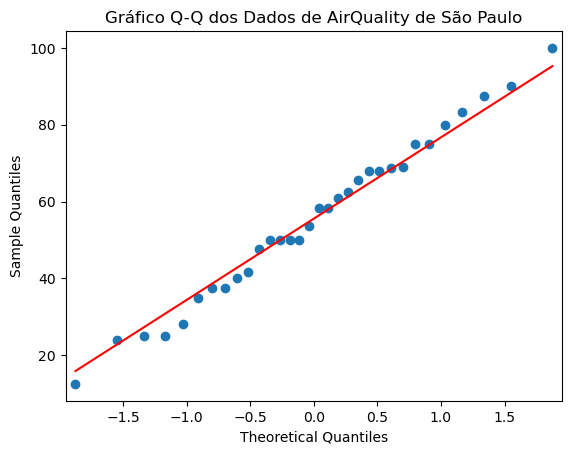

Verificando se os dados de "AirQuality" dos estados do Rio de Janeiro, Espírito Santo e Minas Gerais estão normalizados:


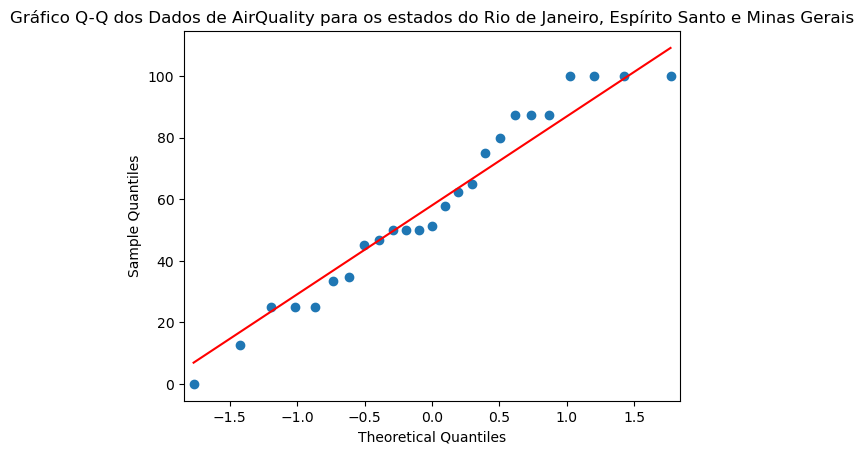

In [732]:
# 2. Os dados em cada grupo devem seguir uma distribuição normal:
# Para realizar esse teste pode ser usado o gráfico Q-Q (Quantil-Quantil)

sp = ['Sao Paulo']
# variável que ajudará a filtrar o dataframe para somente os dados de São Paulo

mg_rj_es = ['Minas Gerais', 'Rio de Janeiro', 'Espirito Santo']
# variável que ajudará a filtrar o dataframe para somente os dados de Rio de Janeiro, Espírito Santo e Minas Gerais

sp_AirQuality = df[df['Region'].isin(sp)]['AirQuality']
#isin() -> seleciona somente as linhas que contém os valores passados, neste caso é estados_sudeste
# após filtrar as linhas, os dados que estão na coluna "AirQuality" serão selecionados

mg_rj_es_AirQuality = df[df['Region'].isin(mg_rj_es)]['AirQuality']
#isin() -> seleciona somente as linhas que contém os valores passados, neste caso é estados_sul
# após filtrar as linhas, os dados que estão na coluna "AirQuality" serão selecionados

print('Verificando se os dados de "AirQuality" de São Paulo estão normalizados:')
sm.qqplot(sp_AirQuality, line='s')
# sm.qqplot() -> Função de statsmodels que cria um gráfico Q-Q dos dados de São Paulo
plt.title('Gráfico Q-Q dos Dados de AirQuality de São Paulo')
# Define o título do gráfico Q-Q
plt.show()
# mostra o gráfico

print('Verificando se os dados de "AirQuality" dos estados do Rio de Janeiro, Espírito Santo e Minas Gerais estão normalizados:')
sm.qqplot(mg_rj_es_AirQuality, line='s')
# sm.qqplot() -> Função de statsmodels que cria um gráfico Q-Q dos dados do Rio de Janeiro, Espírito Santo e Minas Gerais
plt.title('Gráfico Q-Q dos Dados de AirQuality para os estados do Rio de Janeiro, Espírito Santo e Minas Gerais')
# Define o título do gráfico Q-Q
plt.show()
# mostra o gráfico

# A partir dos gráficos, afirmamos que os dois grupos estão normalizados, já que as observações estão muito próximos da linha vermelha (aceita valores aproximados)

In [733]:
# 3. As variâncias dos dados em cada grupo devem ser aproximadamente iguais:
# O teste de levene pode ser usado para ver se as variâncias são aproximadamente iguais

# Hipótese Nula (H0): As variâncias dos dois grupos são iguais.
# Hipótese Alternativa (H1): As variâncias dos dois grupos são diferentes.
# Nível de Significância (alpha): Geralmente 0.05

estatística_levene, p_valor = levene(sp_AirQuality, mg_rj_es_AirQuality)
# levene() -> retorna dois valores, a estatística de Levene e a probabilidade associada à estatística de teste
# estatística de Levene ->  compara as variâncias dentro de cada grupo e entre os grupos
# p_valor -> deriva da estatística de Levene

print("Estatística de Teste de Levene:", estatística_levene)
print("P-valor:", p_valor)

# Neste caso o p_valor (0.095622...) for maior que o nível de significância (0.05), ou seja, não rejeitamos a hipótese nula o que torna as variãncias dos dois grupos iguais. Porém se o p_valor for
# menor que o nível de significância, rejeitamos a hipótese nula e as variâncias são diferentes

Estatística de Teste de Levene: 2.8749508685983103
P-valor: 0.0956223294382416


In [736]:
# Hipótese Nula (H0): A hipótese de que não há diferença significativa entre a média de sp_AirQuality e mg_rj_es _AirQuality
# Hipótese Alternativa (H1): A hipótese de que há diferença significativa entre a média de sp_AirQuality e mg_rj_es_AirQuality

# Realizar o teste T
teste_t = pg.ttest(mg_rj_es_AirQuality, sp_AirQuality, alternative='two-sided')
# pg.ttest() -> usada para realizar um teste t de amostras independentes (no caso são sp_AirQuality e mg_rj_es_AirQuality)
# alternative='two-sided' -> bilateral

print(teste_t)

# Neste caso o p-valor (0.724054) foi maior que o nível de significância (0,05), então não rejeitamos a hipótese nula e ela se torna verdadeira, dizendo que a média de mg_rj_es_AirQuality e 
# sp_AirQuality não possui diferença significativa. Porém, se o p-valor for menor que o nível de significância (0,05), rejeitamos a hipótese nula e a hipótese alternativa é verdadeira, dizendo que 
# há diferença significativa entre a média de sp_AirQuality e mg_rj_es_AirQuality

               T        dof alternative     p-val            CI95%   cohen-d  \
T-test  0.355399  42.384139   two-sided  0.724054  [-11.67, 16.66]  0.098578   

         BF10     power  
T-test  0.284  0.065219  


In [738]:
# ANOVA para verificar se a média dos dados de "AirQuality" dos estados do sudeste são estatisticamente diferentes entre eles:

In [740]:
estados_sudeste = ['Sao Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espirito Santo']

df_sudeste_AirQuality = df[df['Region'].isin(estados_sudeste)]
# faz uma filtragem do DataFrame df, criando outro DataFrame chamado df_sudeste_AirQuality que mostra somente os dados onde na coluna "Region" aparece São Paulo, Rio de Janeiro, Espirito Santo e 
# Minas Gerais

# Hipótese Nula (H0): A hipótese nula afirma que não há diferença significativa entre as médias dos grupos. Em outras palavras, todos os grupos são considerados estatisticamente iguais em termos da 
#variável que está sendo testada.

# Hipótese Alternativa (H1): A hipótese alternativa contradiz a hipótese nula e afirma que pelo menos um dos grupos é estatisticamente diferente dos outros em relação à variável testada.

anova_result = pg.anova(dv='AirQuality', between='Region', data=df_sudeste_AirQuality)
# pg.anova() -> função da biblioteca Pingouin usada para realizar a ANOVA
# dv -> variável contém os dados que você quer comparar entre diferentes grupos
# between -> Nome da coluna que define os grupos para comparação (variável independente)
# data -> dataframe que será analisado

print(anova_result)

# Neste caso o p-unc (0.830511) é maior que 0.05 (nível de significância), não rejeitando a hipótese nula, indicando que não há uma diferença significativa entre as médias dos estados do sudeste. 
# Mas, se o p-unc for menor que 0.05, rejeitamos a hipótese nula, indicando que pelo menos um dos grupos é estatisticamente diferente dos outros em relação à variável testada

   Source  ddof1  ddof2         F     p-unc       np2
0  Region      3     53  0.292658  0.830511  0.016296


In [742]:
# Correlação entre as colunas "AirQuality" e "WaterPollution":

In [744]:
# Primeiro precisamos saber qual tipo de correlação tem entre as duas colunas
# Correlação Positiva Forte ->  coeficiente de correlação está próximo de 1
# Correlação Positiva Fraca -> coeficiente de correlação mais próximo de 0 do que de 1
# Correlação Zero -> coeficiente de correlação é próximo de zero
# Correlação Negativa Forte -> coeficiente de correlação está próximo de -1
# Correlação Não Linear -> outro tipo de relação

coeficiente_de_correlação = df['AirQuality'].corr(df['WaterPollution'])
# corr() -> usada para calcular o coeficiente de correlação entre colunas de um DataFrame (no caso AirQuality e WaterPollution)
print(f'O coeficiente de correlação é: {coeficiente_de_correlação}')

# Com o coeficiente de correlação de -0.4541726225939313 entre AirQuality e WaterPolluition, podemos afirmar que a correlação que está entre a Correlação fraca e Correlação forte (Correlação 
# moderada), o que significa que conforme uma aumenta, a outra tende a diminuir, mas essa relação não é muito forte. É importante notar que a correlação não implica causalidade. Ou seja, a correlação
# negativa entre essas variáveis não necessariamente significa que uma causa a outra

O coeficiente de correlação é: -0.4541726225939313


In [746]:
# Gráfico de dispersão das colunas "AirQuality" e "WaterPollution":

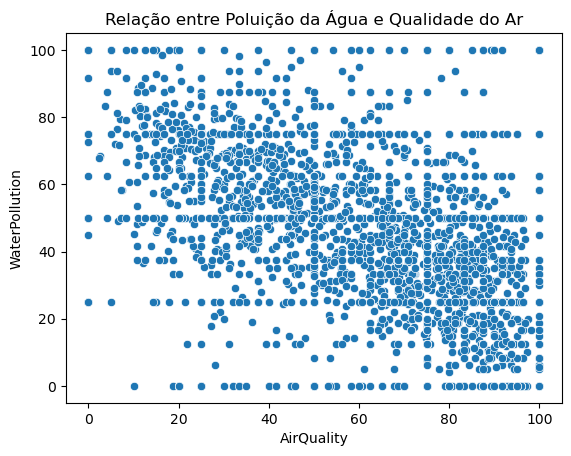

In [748]:
sns.scatterplot(data=df, y='WaterPollution', x='AirQuality')
# sns.scatterplot() -> cria um gráfico de dispersão
plt.title('Relação entre Poluição da Água e Qualidade do Ar')
# plt.title() -> define o título do gráfico
plt.show()
# plt.show() -> mostra o gráfico

# O gráfico de dispersão mostra a relação entre AirQuality e WaterPollution. Com um coeficiente de correlação de -0.454, observamos uma correlação negativa moderada. Isso indica que, em geral, à 
# medida que "AirQuality" melhora, "WaterPollution" tende a diminuir. A relação não é perfeitamente linear, sugerindo que há outros fatores influenciando WaterPollution. 

In [750]:
# Regressão entre as colunas "AirQuality" e "WaterPollution"

In [752]:
# A regressão é uma técnica que modela a relação entre uma variável dependente e uma ou mais variáveis independentes, permitindo fazer previsões e inferir causalidade

modelo1 = smf.ols('WaterPollution ~ AirQuality', data=df).fit()
# smf.ols() -> função que cria um modelo de regressão linear ordinária, mostrando como uma variável preve outro vairável
# Está mostrando como preve o WaterPollution através de AirQuality
# fit() -> ajusta o modelo de dados

print(modelo1.summary())
# summary() -> método que gera um resumo estatístico do modelo

# Coeficiente de "AirQuality" -> -0.3767, significa que em média, para cada aumento de uma unidade de "AirQuality", espera-se uma diminuição de aproximadamente 0.3767 unidades em "WaterPollution"
# Coeficiente de intercepto -> 68.0841, quando a "AirQuality" é 0, o valor de "WaterPollution" é de aproximadamente 68.0841
# R-squared -> 0.206 (20,6%), isso explique que a AirQuality não possui uma causalidade grande em relação à WaterPollution, isso indica que também há outro fator que influencia a WaterPollution
# modelo de regressão linear -> WaterPollution = 68,0841 - 0,3767 * AirQuality 

                            OLS Regression Results                            
Dep. Variable:         WaterPollution   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     1029.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          5.55e-201
Time:                        00:48:00   Log-Likelihood:                -18025.
No. Observations:                3963   AIC:                         3.605e+04
Df Residuals:                    3961   BIC:                         3.607e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.0841      0.816     83.421      0.0

In [754]:
# Gráfico de dispersão 

C:\Users\Nicolas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


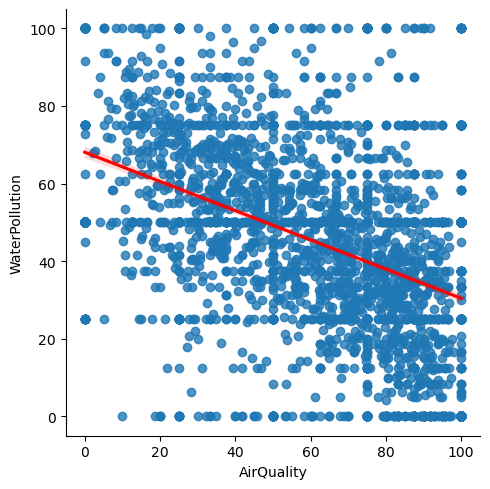

In [760]:
sns.lmplot(data=df, x='AirQuality', y='WaterPollution', line_kws={'color': 'red'})
# sns.lmplot() -> cria um gráfico de dispersão (scatter plot) e ajusta uma linha de regressão linear
plt.show()
#plt.show() -> mostra o gráfico

# Cada ponto no gráfico representa uma observação individual no conjunto de dados
# Esse gráfico de regressão mostra a relação entre "AirQuality" e "WaterPollution" com uma linha de tendência ajustada, mostrando a tendência dos dados